<a href="https://colab.research.google.com/github/tamireszoliveira/Analise-Unicornios/blob/main/Projeto_Unic%C3%B3rnios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Empresas Unicórnio
Empresas unicórnio são aquelas startups que atingem uma valorização de mercado de pelo menos um bilhão de dólares. Esse termo foi cunhado pela investidora de capital de risco Aileen Lee em 2013 para descrever a raridade dessas empresas, já que, na época, havia poucas startups que alcançavam essa valorização. A ideia é que, assim como os unicórnios, essas empresas são raras e especiais.🦄

[Download da Base de Dados
](https://www.kaggle.com/datasets/ramjasmaurya/unicorn-startups)


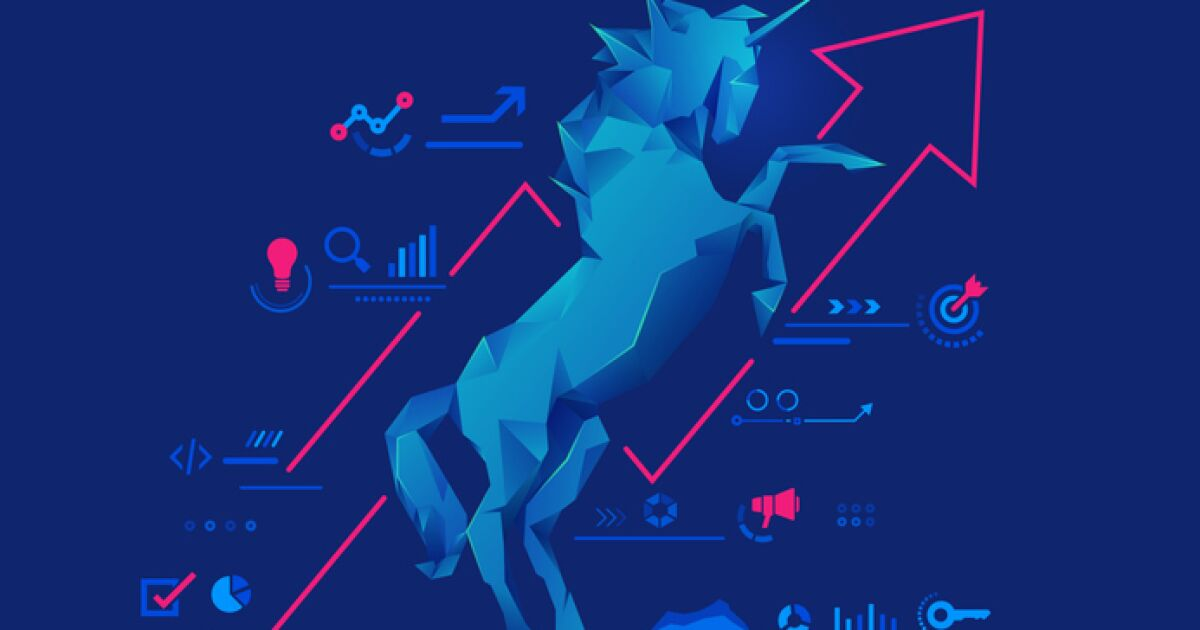

In [17]:
#libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv('Startups+in+2021+end.csv')

In [19]:
df.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [38]:
df.columns

Index(['Id', 'Empresa', 'Valor ($)', 'Data de Adesão', 'País', 'Cidade',
       'Setor', 'Investidores'],
      dtype='object')

In [37]:
#colunas
df.rename(columns={
    'Unnamed: 0' : 'Id',
    'Company' : 'Empresa',
    'Valuation ($B)' : 'Valor ($)',
    'Date Joined' : 'Data de Adesão',
    'Country': 'País',
    'City': 'Cidade',
    'Industry': 'Setor',
    'Select Investors': 'Investidores'
 }, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              936 non-null    int64 
 1   Empresa         936 non-null    object
 2   Valor($B)       936 non-null    object
 3   Data de Adesão  936 non-null    object
 4   País            936 non-null    object
 5   Cidade          921 non-null    object
 6   Setor           936 non-null    object
 7   Investidores    935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [ ]:
df['Setor'].value_counts(normalize = True)

,proportion
Setor,
Fintech,0.202991
Internet software & services,0.178419
E-commerce & direct-to-consumer,0.108974
Artificial intelligence,0.073718
Health,0.067308
"Supply chain, logistics, & delivery",0.054487
Other,0.054487
Cybersecurity,0.043803
Mobile & telecommunications,0.039530


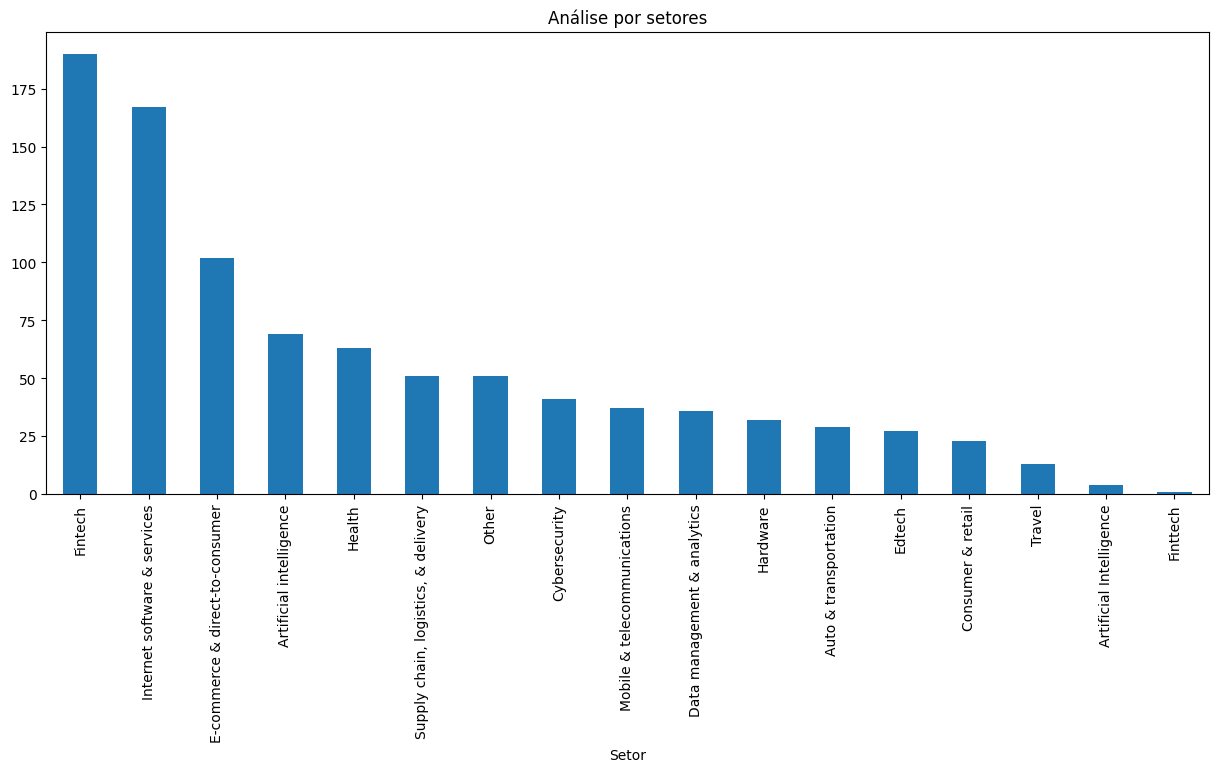

In [ ]:
plt.figure(figsize = (15,6))
plt.title('Análise por setores')
df['Setor'].value_counts().plot(kind = 'bar');

In [ ]:
Análise = round(df['País'].value_counts(normalize = True)* 100 , 1)


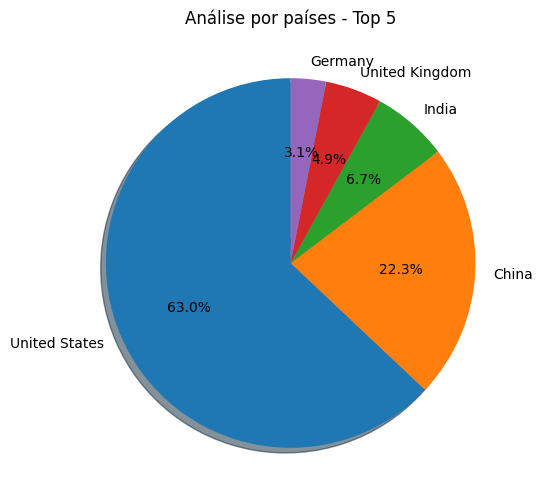

In [ ]:
plt.figure(figsize=(15, 6))
plt.title('Análise por países - Top 5')
plt.pie(Análise.head(5), labels = Análise.index[0:5], shadow = True, startangle = 90, autopct = '%1.1f%%');

In [ ]:
# tratamento do campo data
df['Data de Adesão'] = pd.to_datetime(df['Data de Adesão'])

In [ ]:
# extract data
df['Mes'] = pd.DatetimeIndex(df['Data de Adesão']).month
df['Ano'] = pd.DatetimeIndex(df['Data de Adesão']).year
df.head()

,Id,Empresa,Valor($B),Data de Adesão,País,Cidade,Setor,Investidores,Mes,Ano
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [ ]:
# tabela analítica
Analise_agrupada = df.groupby(by= ['País', 'Ano', 'Mes', 'Empresa']).count()['Id'].reset_index()
Analise_agrupada

,País,Ano,Mes,Empresa,Id
0,Argentina,2021,8,Uala,1
1,Australia,2018,1,Canva,1
2,Australia,2019,3,Airwallex,1
3,Australia,2021,5,SafetyCulture,1
4,Australia,2021,7,Culture Amp,1
...,...,...,...,...,...
931,United States,2021,12,Panther Labs,1
932,United States,2021,12,ReliaQuest,1
933,United States,2021,12,YipitData,1
934,"United States,",2021,9,TrialSpark,1


In [ ]:
Analise_agrupada.loc[Analise_agrupada['País']== 'Brazil']

,País,Ano,Mes,Empresa,Id
12,Brazil,2018,3,Nubank,1
13,Brazil,2018,7,Movile,1
14,Brazil,2018,11,iFood,1
15,Brazil,2019,6,Loggi,1
16,Brazil,2019,9,QuintoAndar,1
17,Brazil,2019,10,EBANX,1
18,Brazil,2019,12,Wildlife Studios,1
19,Brazil,2020,1,Loft,1
20,Brazil,2020,12,C6 Bank,1
21,Brazil,2020,12,Creditas,1


In [40]:
df['Valor ($)']= pd.to_numeric(df['Valor ($)'].apply(lambda Linha: Linha.replace('$', '')))
df.head()

,Id,Empresa,Valor ($),Data de Adesão,País,Cidade,Setor,Investidores
0,0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [44]:
# tabela analítica
Analise_Pais = df.groupby(by = ['País']).sum()['Valor ($)'].reset_index()
Analise_Pais.head()

,País,Valor ($)
0,Argentina,2.45
1,Australia,50.60
2,Austria,5.81
3,Belgium,7.55
4,Bermuda,1.60


In [46]:
Analise_Pais.sort_values('Valor ($)', ascending=False)

,País,Valor ($)
44,United States,1604.03
8,China,569.48
43,United Kingdom,150.29
18,India,148.45
16,Germany,66.63
5,Brazil,61.05
38,Sweden,58.08
1,Australia,50.60
22,Israel,43.82
17,Hong Kong,41.45


In [47]:
Analise_Valor = Analise_Pais.sort_values('Valor ($)', ascending=False)
Analise_Valor.head()

,País,Valor ($)
44,United States,1604.03
8,China,569.48
43,United Kingdom,150.29
18,India,148.45
16,Germany,66.63


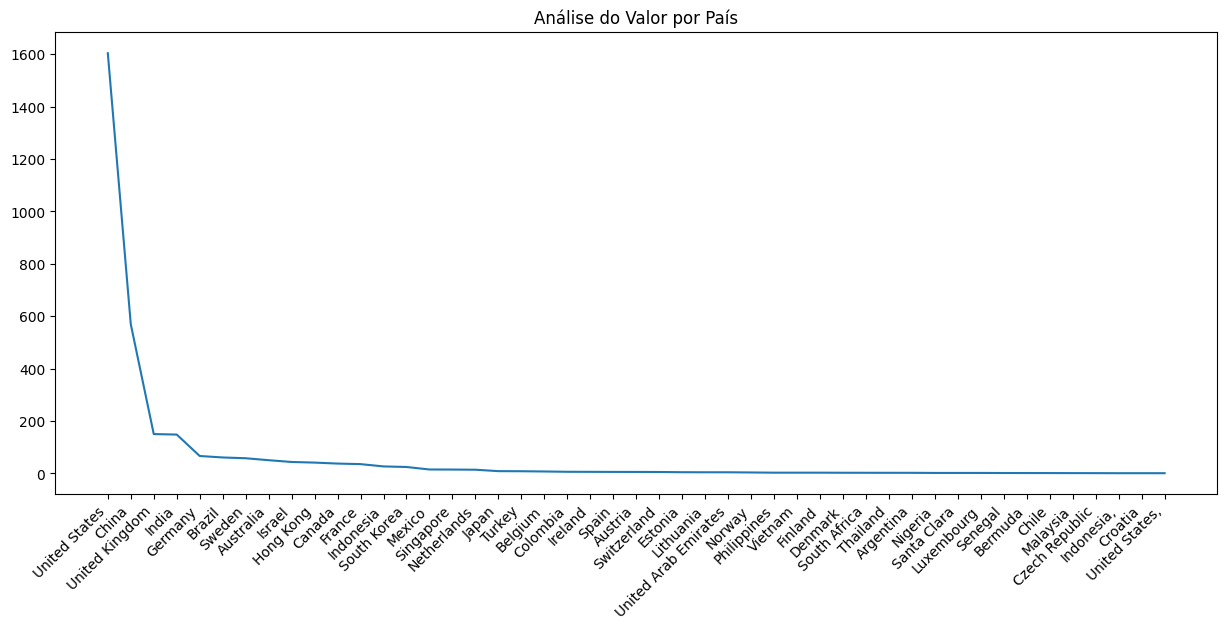

In [49]:
plt.figure(figsize=(15, 6))
plt.title('Análise do Valor por País')
plt.plot(Analise_Valor['País'], Analise_Valor['Valor ($)'])
plt.xticks( rotation=45, ha='right');

#Conclusão da análise

Dessa forma, de modo contraintuitivo, concluímos que a valorização dessas empresas unicórnio não tem relação direta com a quantidade de unicórnios gerada em cada país.